Lab2 has 3 parts:

The following code is provided to you to understand how full-batch-gradient-descent and stochastic-gradient-descent is implemented to optimize the training of a regression model, using california housing dataset. 

1- Study the code by going through the implementation and provide a high-level algorithm (a pseudocode)corresponding to the solution given below. Make sure that your algorithm is conceptually aligned with the topics discussed in the lecture. 

2- Analyze the SGD abd BGD trends visualized by the code and describe the implications of the plot as a comparison of the two optimization techniques used. 

3- Create a new "Code" cell below the results, and copy and paste the provided code. Then manipluate the code to provide a visualized comparison between SGD, BGD, and Mini-BGD using different batch sizes 2, 5, 7, 10. Report your analysis of the trends seen in the plot. 

dataset size:20640
BGD MSE: 8.221670081764076
SGD MSE: 25.223717045949055


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

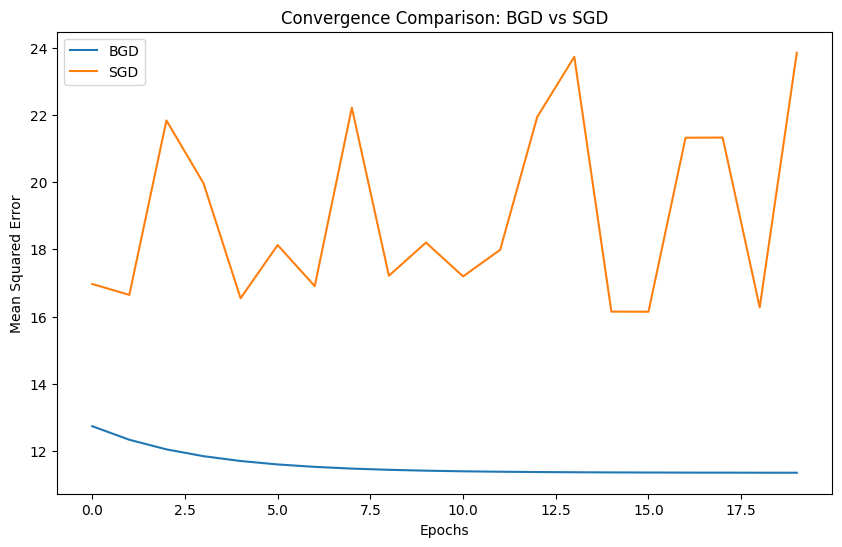

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        # size of the dataset
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history


# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD')
plt.plot(sgd_loss_history, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.show()


### PART 1

1. Load the California Housing dataset.  
2. Split the dataset into training and test sets (80:20).  
3. Standardize the training and test features.  
4. Add a bias term (column of ones) to both train and test feature matrices.  
5. Define a `LinearRegression` class:  
   a. Initialize model parameters randomly.  
   b. For a number of epochs:  
      i. Split training data based on `batch_size`:  
         - If `batch_size` is `None` → Full batch (BGD)  
         - If `batch_size == 1` → Single sample (SGD)  
         - If `batch_size` in [2, 5, 10, ...] → Mini-Batch  
      ii. Compute predictions and errors.  
      iii. Compute gradients and update parameters.  
      iv. Track Mean Squared Error (MSE) per epoch.  
6. Train the model using BGD and SGD.  
7. Evaluate both models on test data using MSE.  
8. Plot training MSE curves for both BGD and SGD.  

---

### PART 2

**Batch Gradient Descent (BGD):**  
a. Shows smooth convergence across epochs.  
b. Requires using the entire training dataset per epoch.  
c. Provides stable updates but may take longer to reach the minimum.  

**Stochastic Gradient Descent (SGD):**  
a. Produces noisy updates due to updates on each individual sample.  
b. Faster per iteration but may oscillate around the minimum.  
c. Suitable for large datasets and online learning scenarios.  

**Conclusion:**  
BGD is more stable but slower.  
SGD is faster but noisier.  
Mini-Batch Gradient Descent (Mini-BGD) offers a balance between speed and stability.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

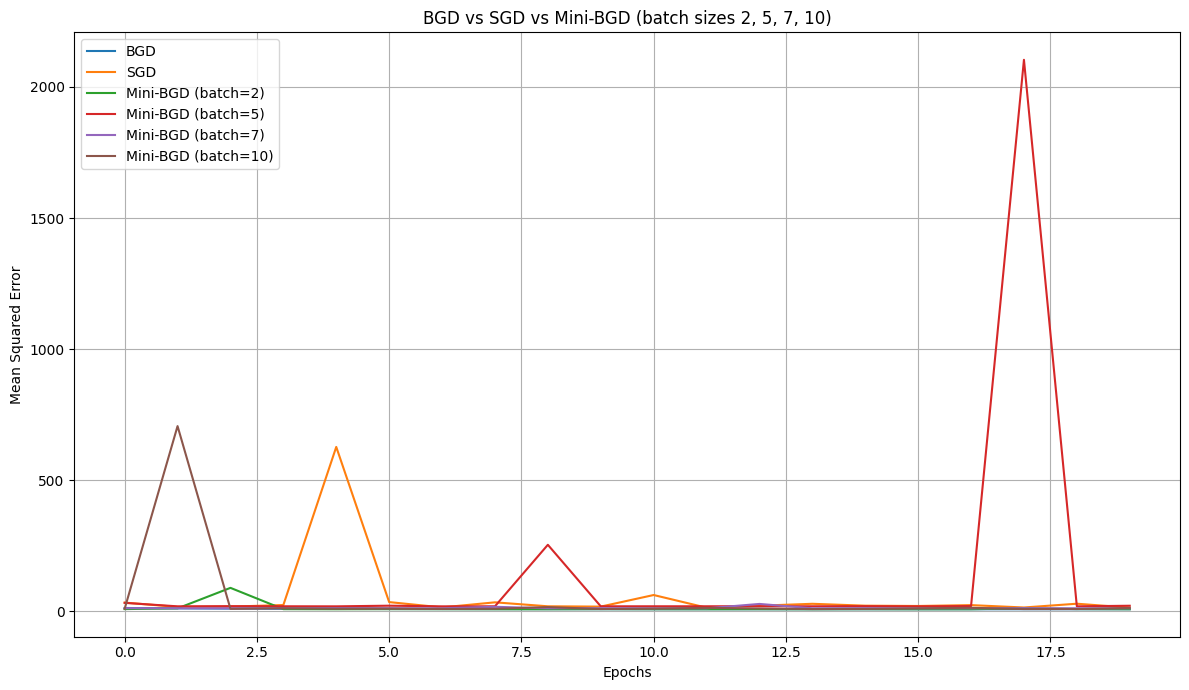

In [2]:
# Mini-Batch and comparison code

# Store results
results = {}

# BGD (Full batch)
bgd_model = LinearRegression()
results["BGD"] = bgd_model.fit(X_train_scaled, y_train, batch_size=None)

# SGD (Single sample)
sgd_model = LinearRegression()
results["SGD"] = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Mini-Batch Gradient Descent with different batch sizes
for batch_size in [2, 5, 7, 10]:
    label = f"Mini-BGD (batch={batch_size})"
    model = LinearRegression()
    loss_history = model.fit(X_train_scaled, y_train, batch_size=batch_size)
    results[label] = loss_history

# Plot the results
plt.figure(figsize=(12, 7))
for label, loss in results.items():
    plt.plot(loss, label=label)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("BGD vs SGD vs Mini-BGD (batch sizes 2, 5, 7, 10)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Part 3: Analysis of BGD vs SGD vs Mini-BGD Plot

1. **BGD (Batch Gradient Descent)**:
   - Shows smooth and stable convergence.
   - Mean Squared Error (MSE) consistently decreases across epochs.
   - Indicates reliable performance without sharp fluctuations.

2. **SGD (Stochastic Gradient Descent)**:
   - Exhibits a highly noisy learning curve.
   - MSE fluctuates across epochs due to parameter updates on individual samples.
   - Though fast in updates, it lacks stability.

3. **Mini-BGD (Mini-Batch Gradient Descent)**:
   - **Batch=2 and 5**: Significant spikes in MSE during certain epochs.
     - Indicates unstable learning due to small batch sizes.
     - Especially batch size 5 shows sharp error jumps.
   - **Batch=7 and 10**: More stable than smaller batches but still has occasional spikes.
     - Mini-BGD with batch=10 shows less variance and closer behavior to BGD.

4. **Conclusion**:
   - BGD offers the most consistent and smooth optimization.
   - SGD is quick but erratic.
   - Mini-BGD offers a trade-off, but very small batch sizes (like 2 or 5) may be too unstable.
   - Mini-BGD with moderate batch sizes (7 or 10) can balance convergence speed and stability.
